In [1]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt
from matplotlib import mlab
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
import joypy


Heart = pd.read_csv('Heart.csv')

print(Heart)
print(Heart.isnull().values.any())


      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

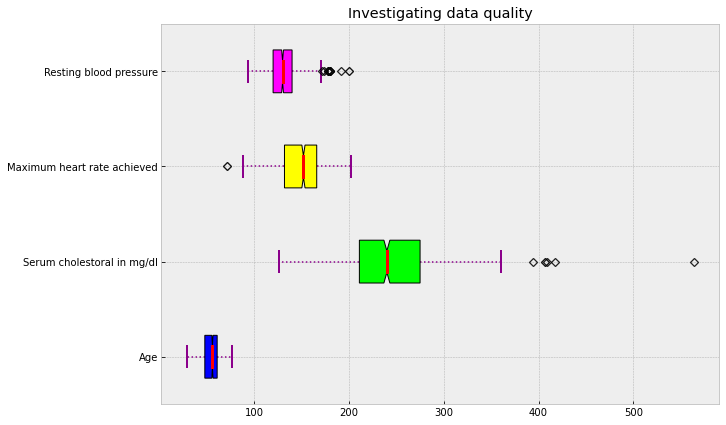

In [74]:
Heart_age = Heart['age']
Heart_chol = Heart['chol']
Heart_thalach = Heart['thalach']
Heart_trestbps = Heart['trestbps']
HeartBoxplot = [Heart_age, Heart_chol, Heart_thalach, Heart_trestbps]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
Heartbp = ax.boxplot(HeartBoxplot, patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF']
 
for patch, color in zip(Heartbp['boxes'], colors):
    patch.set_facecolor(color)
    
# changing color and linewidth of
# whiskers
for whisker in Heartbp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
# changing color and linewidth of
# caps
for cap in Heartbp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
# changing color and linewidth of
# medians
for median in Heartbp['medians']:
    median.set(color ='red',
               linewidth = 3)
# changing style of fliers
for flier in Heartbp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
# x-axis labels
ax.set_yticklabels(['Age', 'Serum cholestoral in mg/dl',
                    'Maximum heart rate achieved', 'Resting blood pressure'])

# Adding title
plt.title("Investigating data quality")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# show plot
plt.show(Heartbp)


     


In [75]:
Heart_chol.head()

0    212
1    203
2    174
3    203
4    294
Name: chol, dtype: int64

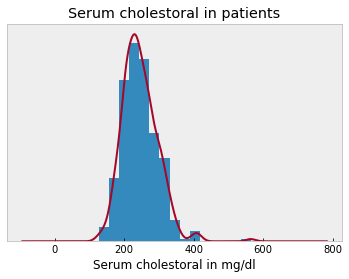

In [77]:
Heart_chol.plot(kind = "hist", density = True, bins = 15) # change density to true, because KDE uses density

# Plot KDE

Heart_chol.plot(kind = "kde")

# Add title and axis names
plt.xlabel('Serum cholestoral in mg/dl')
plt.ylabel('')

plt.title('Serum cholestoral in patients')

plt.yticks([], [])

plt.style.use("bmh")
plt.grid(False)


plt.show()

In [93]:
list(Heart.columns)
HeartCount=Heart.value_counts
print(HeartCount)

<bound method DataFrame.value_counts of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0  

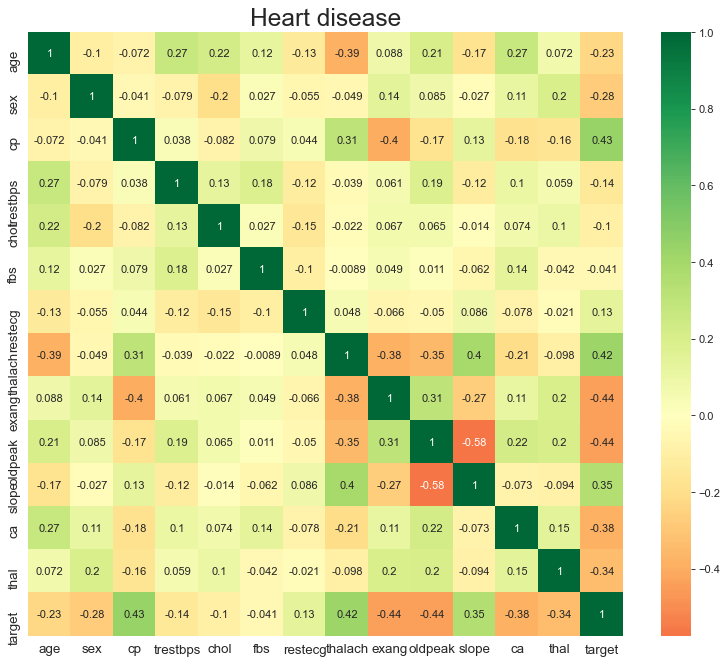

In [98]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(Heart.corr(), xticklabels=Heart.corr().columns, yticklabels=Heart.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Heart disease', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<Figure size 800x640 with 0 Axes>

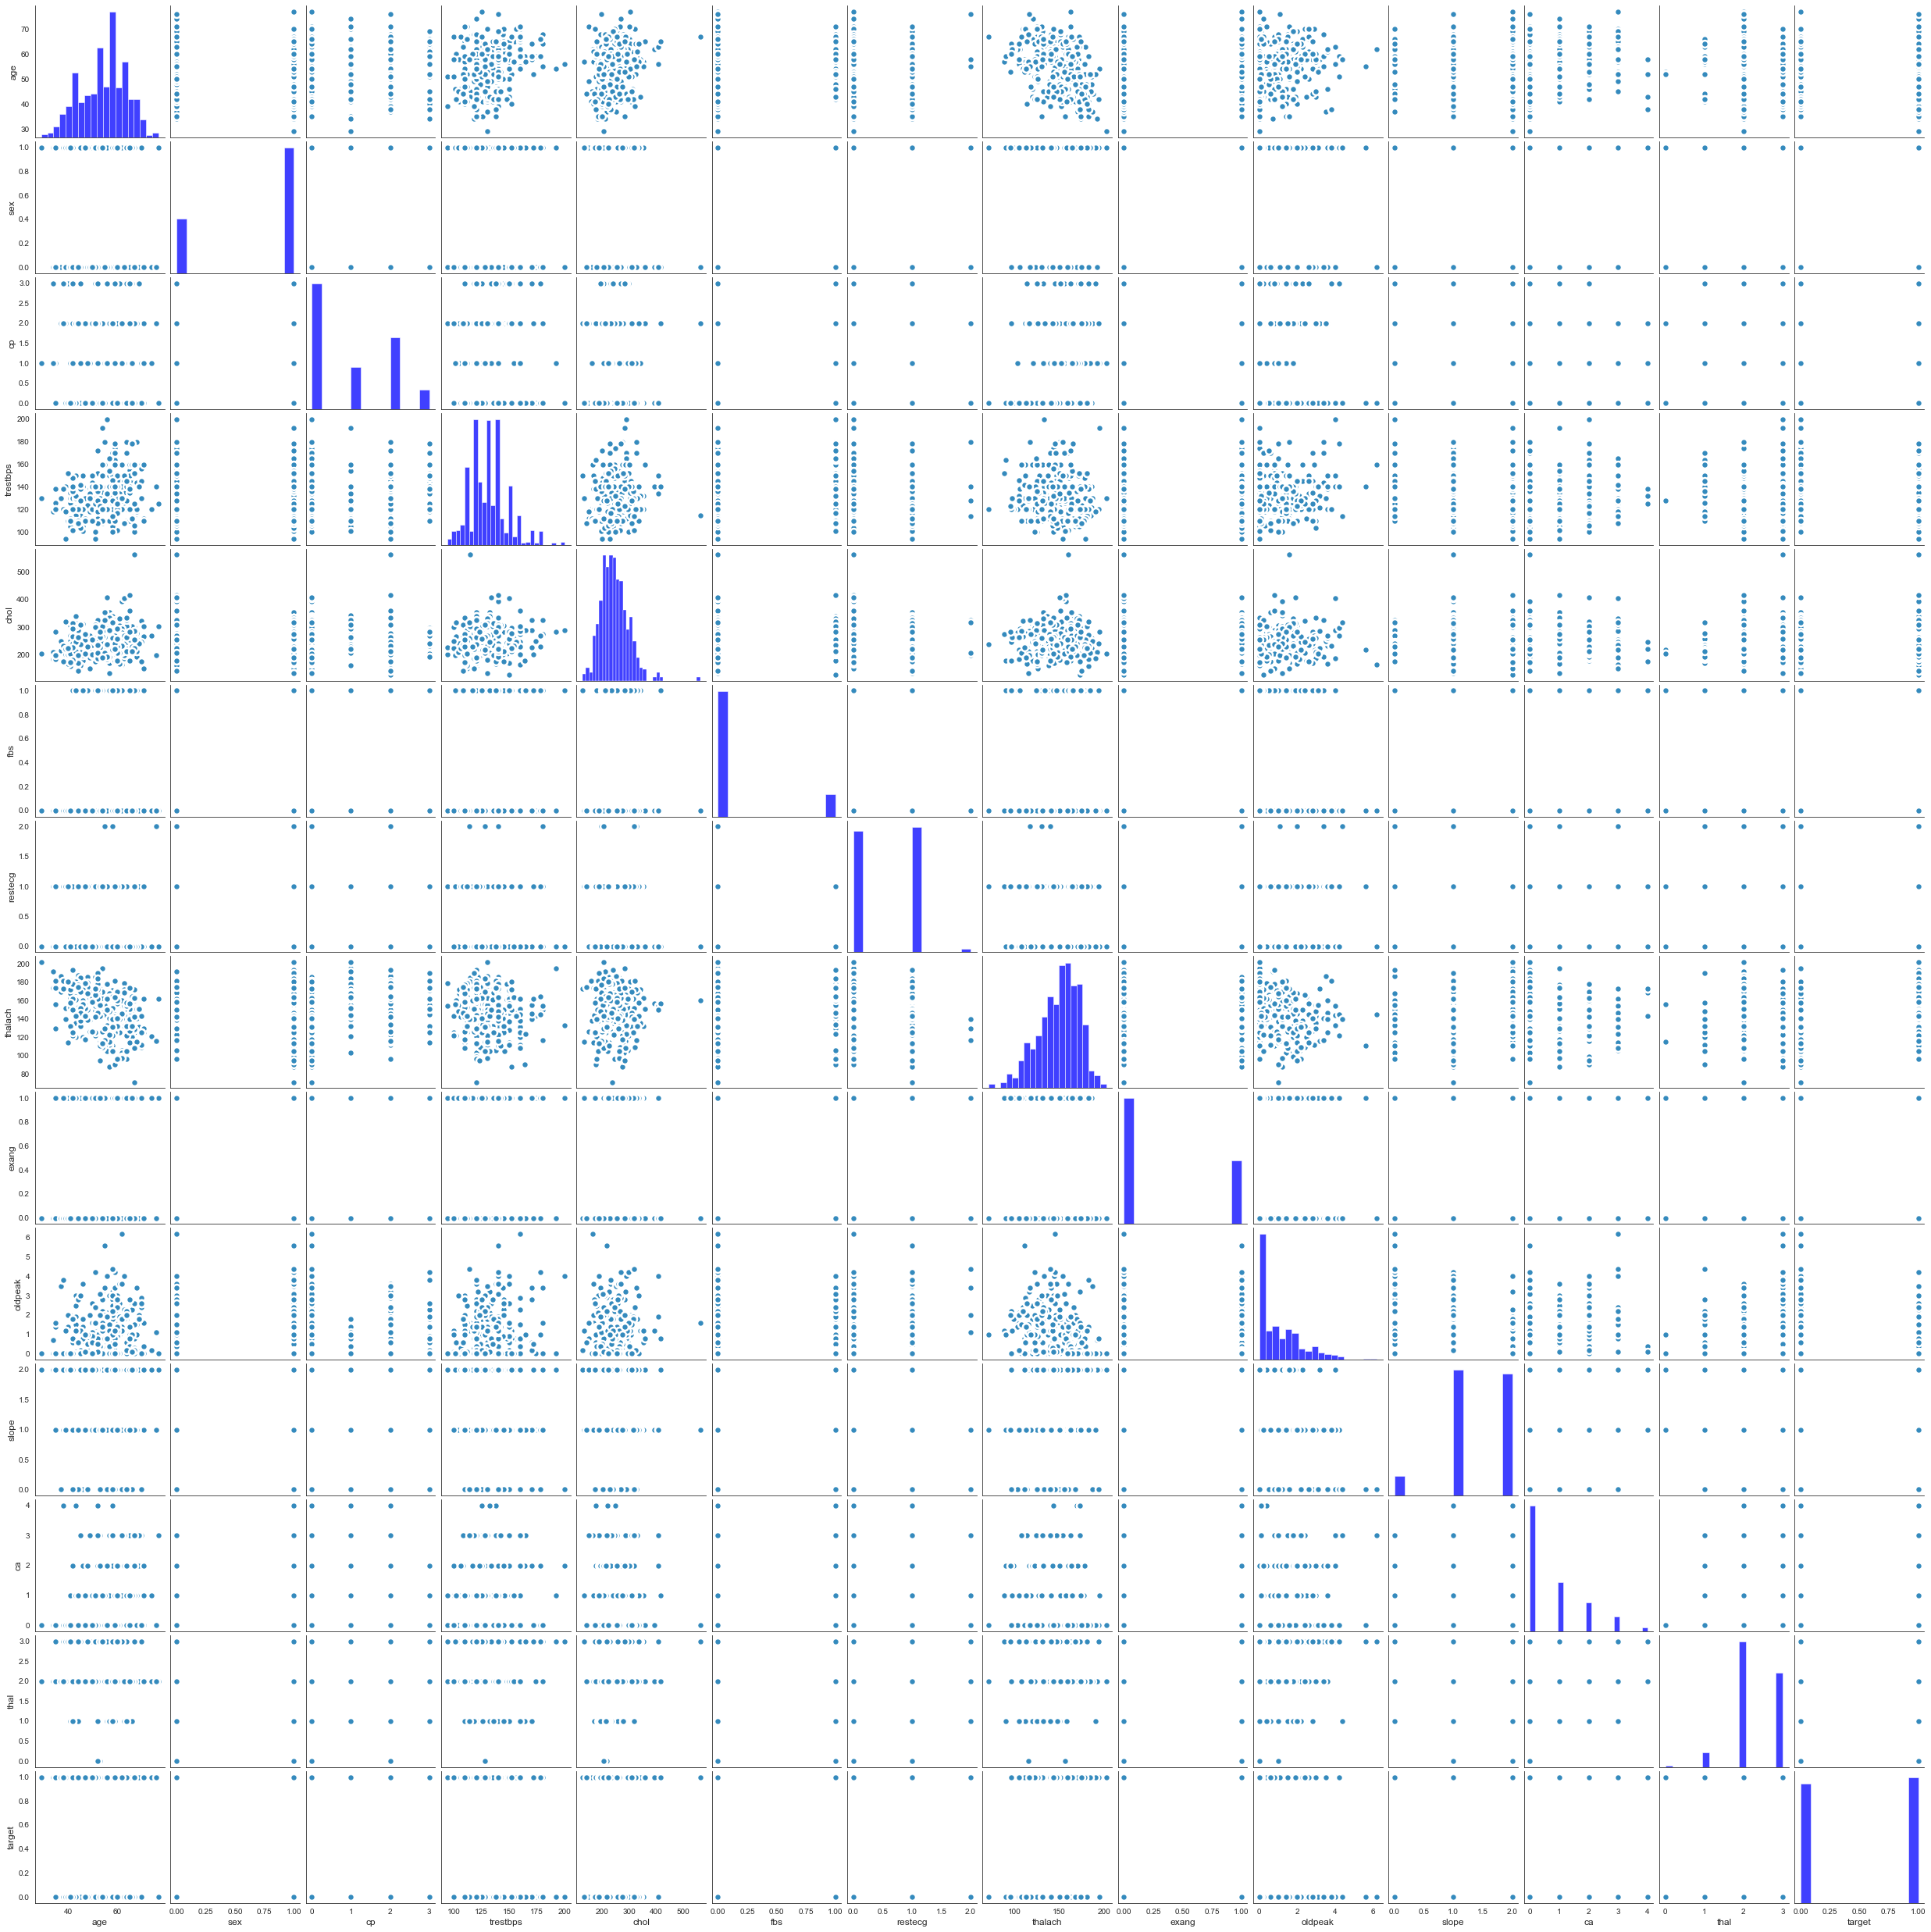

In [100]:
# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(Heart, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

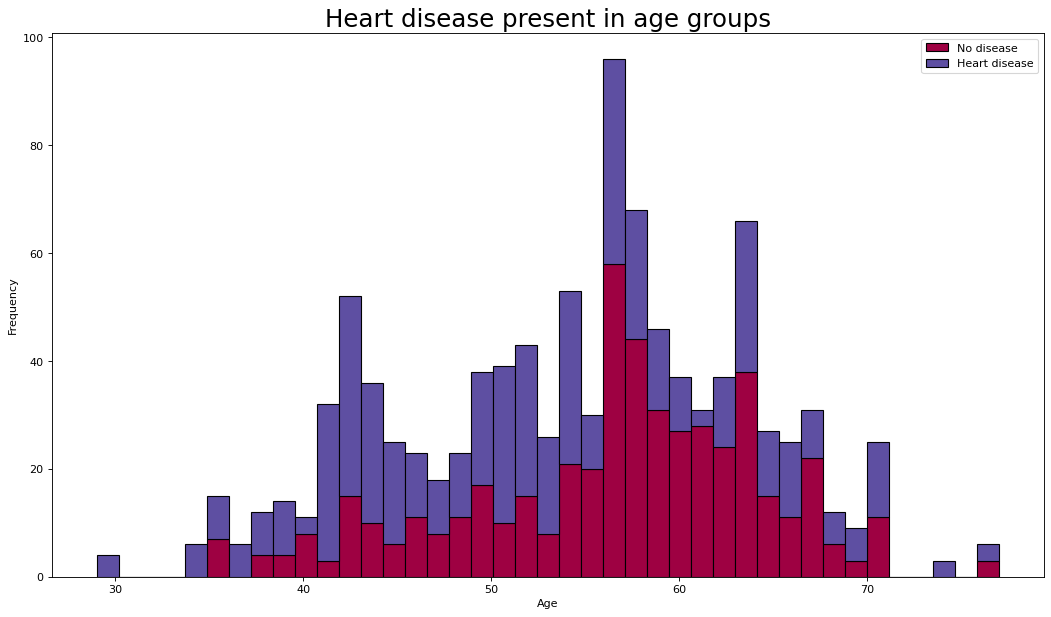

In [17]:
# Preparing data
x_variable ='age'
groupby_variable = 'target'
Heart_target_sex = Heart.loc[:, [x_variable, groupby_variable]].groupby(groupby_variable)
vals = [Heart[x_variable].values.tolist() for i, Heart in Heart_target_sex]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, Heart[x_variable].unique().__len__(), stacked=True, edgecolor='black',density=False,color=colors[:len(vals)])


# Decoration
plt.legend({group:col for group, col in zip(np.unique(Heart[groupby_variable]).tolist(), colors[:len(vals)])})
#create legend
labels= ["No disease","Heart disease"]
plt.legend(labels)


plt.title(f"Heart disease present in age groups", fontsize=22)
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.show()

   sex  counts
0    0     312
1    1     713


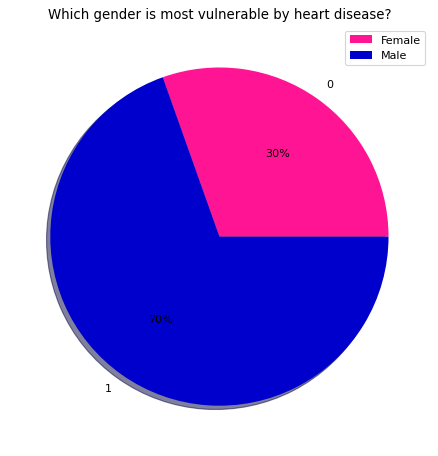

In [24]:
# Prepare data
Heart_gender = Heart.groupby('sex').size().reset_index(name='counts')
print(Heart_gender)
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

# Draw pie plot
data = Heart_gender['counts']
categories = Heart_gender['sex']
mycolors = ["deeppink", "mediumblue"]

#create legend

pielabels= ["Female","Male"]


plt.pie(data, labels=categories,colors = mycolors,autopct='%1.0f%%',shadow = True)
plt.legend(pielabels)
plt.title("Which gender is most vulnerable by heart disease?")

plt.show() 